In [1]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%qtconsole

In [2]:
data_raw_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\raw\\'
data_interim_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\interim\\'
data_processed_dir = 'C:\\Users\\Bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\data\\processed\\'
docs_img_dir = 'C:\\Users\\bryan\\OneDrive\\02 GitHub\\water-pump-tanzania\\docs\\img\\'

In [3]:
df_train_val = pd.read_csv(data_interim_dir + 'training_data_clean_no-geo.csv')

status_group = df_train_val['status_group']

df_test_val = pd.read_csv(data_interim_dir+'test_data_clean_no-geo.csv')

df_comp_val = pd.concat([df_train_val,df_test_val]).reset_index(drop=True)

In [4]:
df_comp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71981 entries, 0 to 71980
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     71981 non-null  int64  
 1   amount_tsh             71981 non-null  float64
 2   gps_height             71981 non-null  int64  
 3   installer              71981 non-null  object 
 4   longitude              71981 non-null  float64
 5   latitude               71981 non-null  float64
 6   basin                  71981 non-null  object 
 7   region                 71981 non-null  object 
 8   district_code          71981 non-null  int64  
 9   population             71981 non-null  int64  
 10  public_meeting         71981 non-null  int64  
 11  permit                 71981 non-null  int64  
 12  extraction_type_class  71981 non-null  object 
 13  management             71981 non-null  object 
 14  payment_type           71981 non-null  object 
 15  wa

Need to encode all object and categorical values.

### amount_tsh

In [5]:
var = 'amount_tsh'

df_comp_val[var].value_counts()

0.00         49780
500.00        3874
50.00         3103
1000.00       1858
20.00         1812
             ...  
59.00            1
38000.00         1
120000.00        1
220.00           1
0.25             1
Name: amount_tsh, Length: 102, dtype: int64

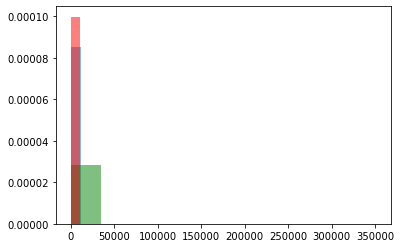

In [6]:
plt.figure()

plt.hist(df_comp_val[df_comp_val['status_group']=='non functional'][var],alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional'][var],color='green',alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional needs repair'][var],color='red',alpha=0.5,density=True);

### gps_height

In [7]:
var = 'gps_height'
var_red = var+'_reduced'

df_comp_val[var].value_counts()

 0       23380
-16         71
-15         69
-13         68
-19         65
         ...  
 2353        1
 2417        1
 2545        1
 2416        1
 2285        1
Name: gps_height, Length: 2456, dtype: int64

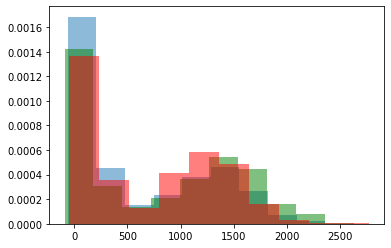

In [8]:
plt.figure()

plt.hist(df_comp_val[df_comp_val['status_group']=='non functional'][var],alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional'][var],color='green',alpha=0.5,density=True);
plt.hist(df_comp_val[df_comp_val['status_group']=='functional needs repair'][var],color='red',alpha=0.5,density=True);

In [9]:
# no difference in distribution between target variables

df_comp_val = df_comp_val.drop(labels=[var],axis=1)

### installer

In [10]:
var = 'installer'
var_red = var+'_reduced'


limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

DWE           20310
unknown        4512
Government     2096
RWE            1467
Commu          1347
Name: installer, dtype: int64

In [11]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other         42249
DWE           20310
unknown        4512
Government     2096
RWE            1467
Commu          1347
Name: installer_reduced, dtype: int64

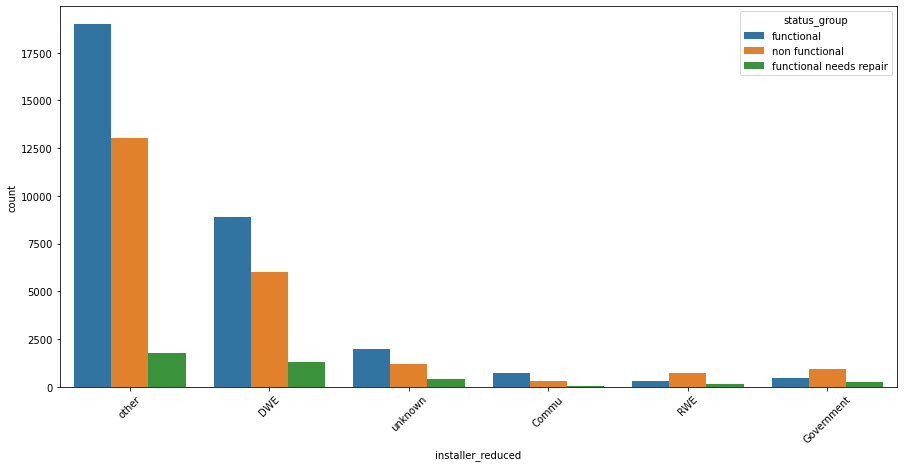

In [12]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [13]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [14]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### basin

In [15]:
var = 'basin'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

Pangani            11143
Lake Victoria      10726
Rufiji              9987
Internal            9642
Lake Tanganyika     7928
Name: basin, dtype: int64

In [16]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other              22555
Pangani            11143
Lake Victoria      10726
Rufiji              9987
Internal            9642
Lake Tanganyika     7928
Name: basin_reduced, dtype: int64

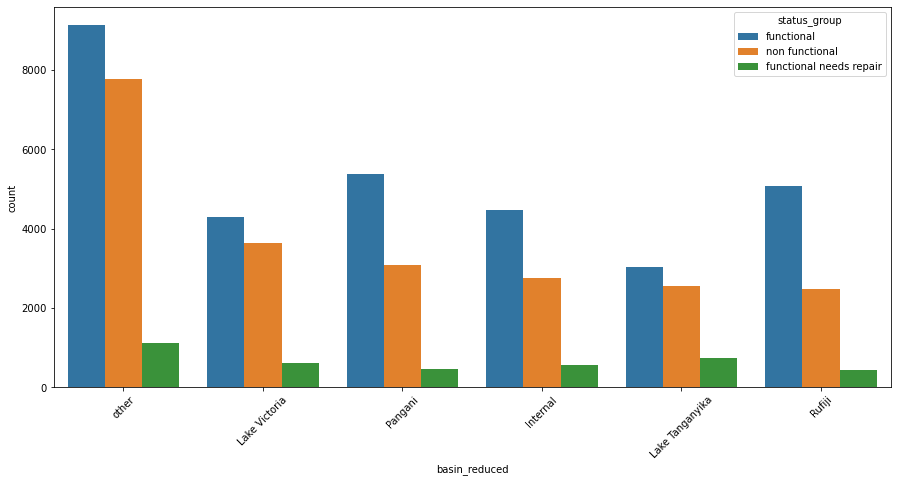

In [17]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [18]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [19]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### region

In [20]:
var = 'region'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

Iringa         6599
Mbeya          5758
Kilimanjaro    5494
Morogoro       5038
Shinyanga      5034
Name: region, dtype: int64

In [21]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

other          44058
Iringa          6599
Mbeya           5758
Kilimanjaro     5494
Morogoro        5038
Shinyanga       5034
Name: region_reduced, dtype: int64

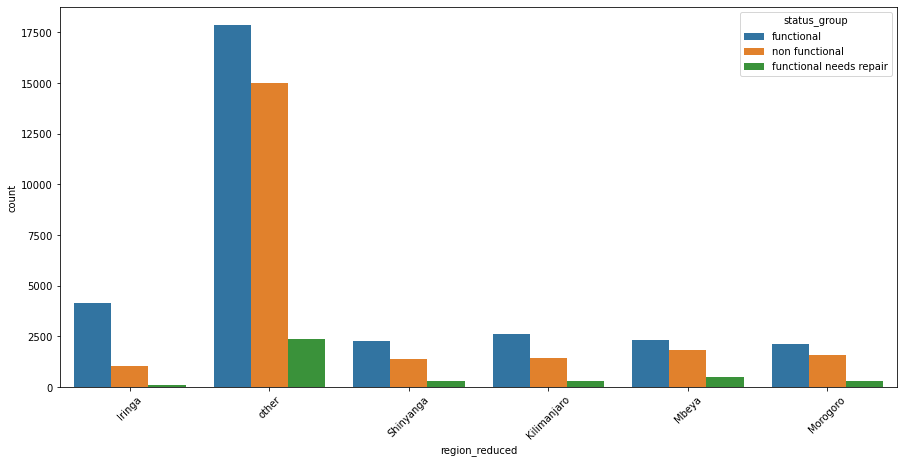

In [22]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [23]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [24]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

## population

<AxesSubplot:>

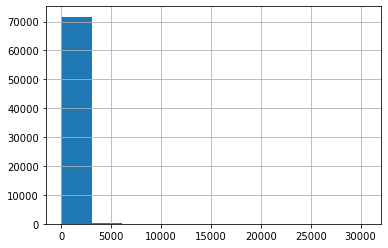

In [25]:
var = 'population'

df_comp_val[var].hist()

In [26]:
df_comp_val[var+'_bin'] = pd.qcut(df_comp_val[var],4,duplicates='drop').astype(str)

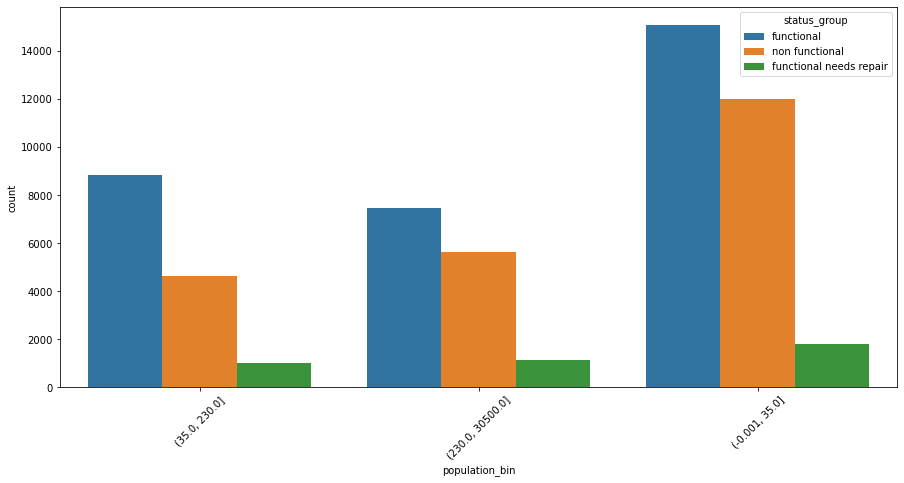

In [27]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var+'_bin',hue='status_group')
plt.xticks(rotation=45);

In [28]:
#df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var+'_bin'],prefix=var)],axis=1)
df_comp_val = df_comp_val.drop(labels=[var+'_bin'],axis=1)

### extraction_type_class

In [29]:
var = 'extraction_type_class'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

gravity        33158
handpump       19028
other           7748
submersible     7607
motorpump       3716
Name: extraction_type_class, dtype: int64

In [30]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

gravity        33158
handpump       19028
other           8472
submersible     7607
motorpump       3716
Name: extraction_type_class_reduced, dtype: int64

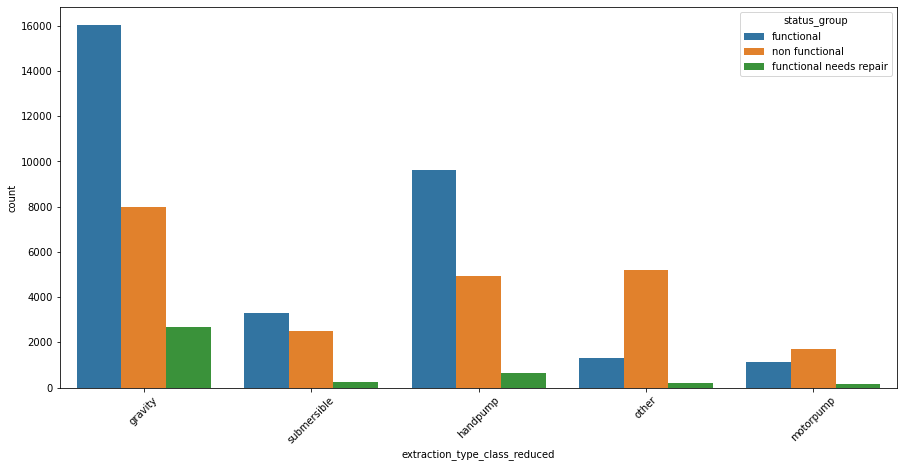

In [31]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [32]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var],prefix=var)],axis=1)

In [33]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### management

In [34]:
var = 'management'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[6:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

vwc                 49677
wug                  6910
water board          3687
wua                  3116
private operator     2503
parastatal           2129
Name: management, dtype: int64

In [35]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

vwc                 49677
wug                  6910
other                3959
water board          3687
wua                  3116
private operator     2503
parastatal           2129
Name: management_reduced, dtype: int64

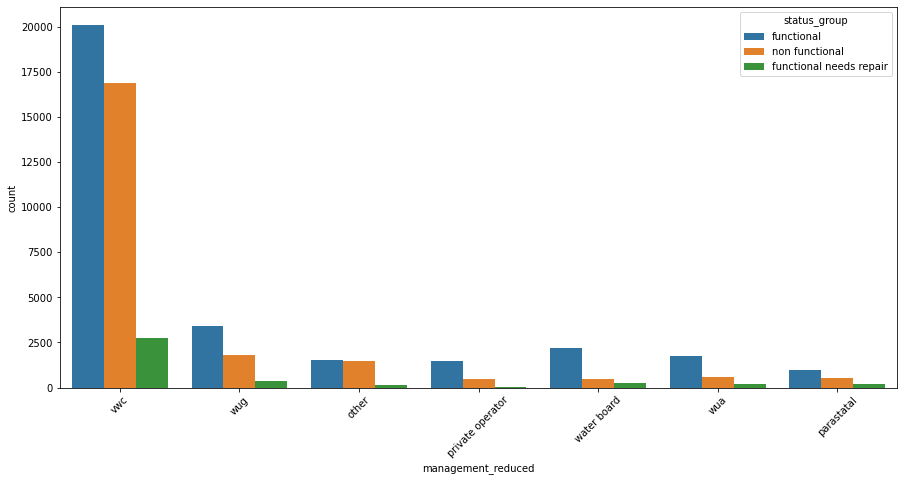

In [36]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [37]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [38]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### payment_type

In [39]:
var = 'payment_type'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[6:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

never pay     30493
per bucket    11228
monthly       10308
unknown        9525
on failure     4754
annually       4550
Name: payment_type, dtype: int64

In [40]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

never pay     30493
per bucket    11228
monthly       10308
unknown        9525
on failure     4754
annually       4550
other          1123
Name: payment_type_reduced, dtype: int64

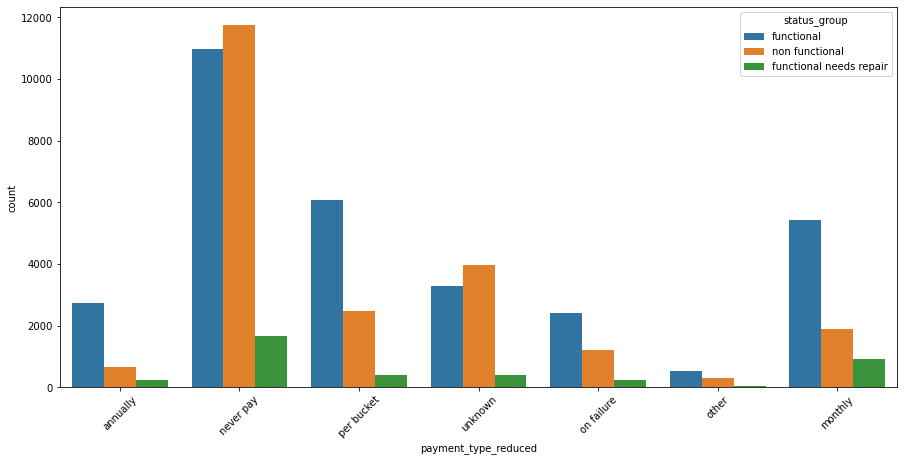

In [41]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [42]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [43]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### water_quality

In [44]:
var = 'water_quality'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[3:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

soft       61763
salty       5979
unknown     2073
Name: water_quality, dtype: int64

In [45]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

soft       61763
salty       5979
other       2166
unknown     2073
Name: water_quality_reduced, dtype: int64

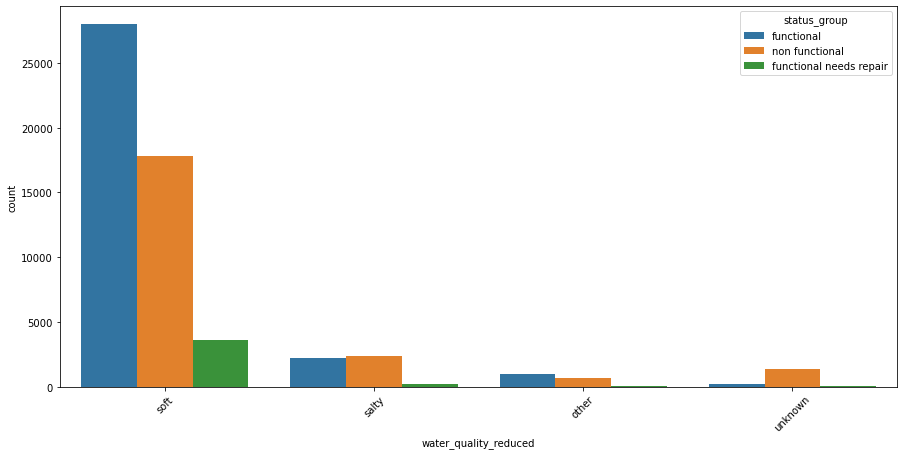

In [46]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [47]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [48]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### quantity

In [49]:
var = 'quantity'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[4:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

enough          40374
insufficient    18177
dry              7459
seasonal         5016
Name: quantity, dtype: int64

In [50]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

enough          40374
insufficient    18177
dry              7459
seasonal         5016
other             955
Name: quantity_reduced, dtype: int64

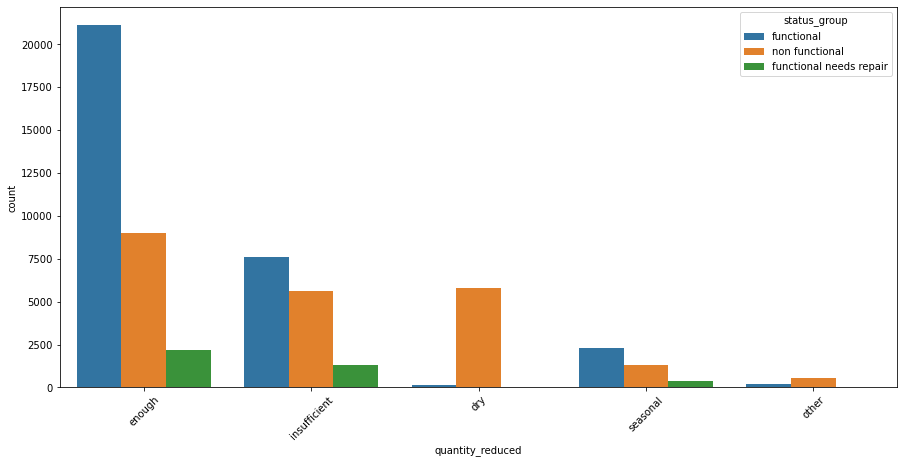

In [51]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [52]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [53]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### source

In [54]:
var = 'source'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[5:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

spring                  21199
shallow well            19482
machine dbh             13505
river                   11964
rainwater harvesting     2764
Name: source, dtype: int64

In [55]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

spring                  21199
shallow well            19482
machine dbh             13505
river                   11964
other                    3067
rainwater harvesting     2764
Name: source_reduced, dtype: int64

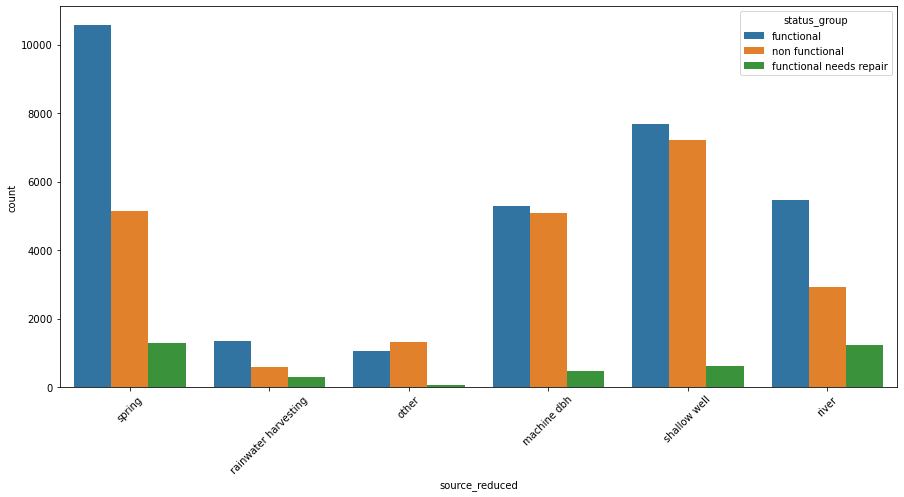

In [56]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [57]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### source_class

In [58]:
var = 'source_class'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[2:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

groundwater    55293
surface        16358
Name: source_class, dtype: int64

In [59]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

groundwater    55293
surface        16358
other            330
Name: source_class_reduced, dtype: int64

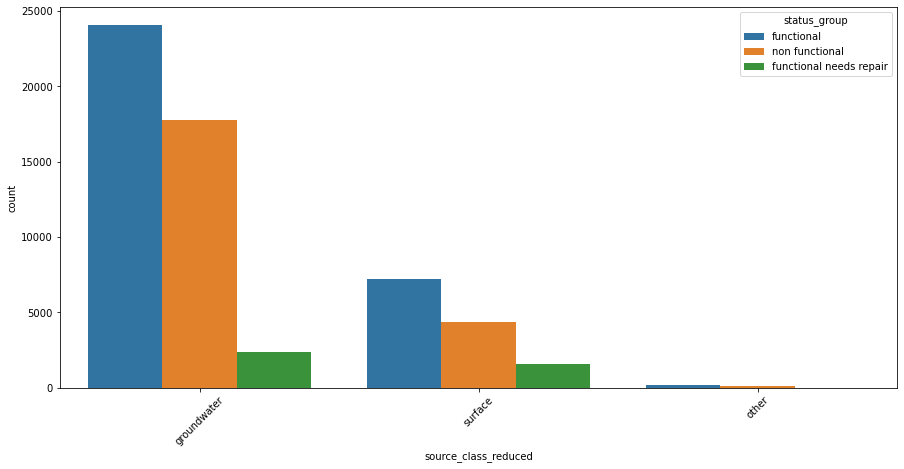

In [60]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [61]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [62]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### waterpoint_type

In [63]:
var = 'waterpoint_type'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[4:]
df_comp_val[var][~df_comp_val[var].isin(limited_list.index.to_list())].value_counts()

communal standpipe             35443
hand pump                      20265
other                           7724
communal standpipe multiple     7433
Name: waterpoint_type, dtype: int64

In [64]:
df_comp_val[var_red] = df_comp_val[var]

# Reduce number of categorical variables, encoding values with less than 1% prevalence to 'other'
for idx in df_comp_val[df_comp_val[var_red].isin(limited_list.index.to_list())].index.tolist():
    df_comp_val.loc[idx,var_red] = 'other'
    
df_comp_val[var_red].value_counts()

communal standpipe             35443
hand pump                      20265
other                           8840
communal standpipe multiple     7433
Name: waterpoint_type_reduced, dtype: int64

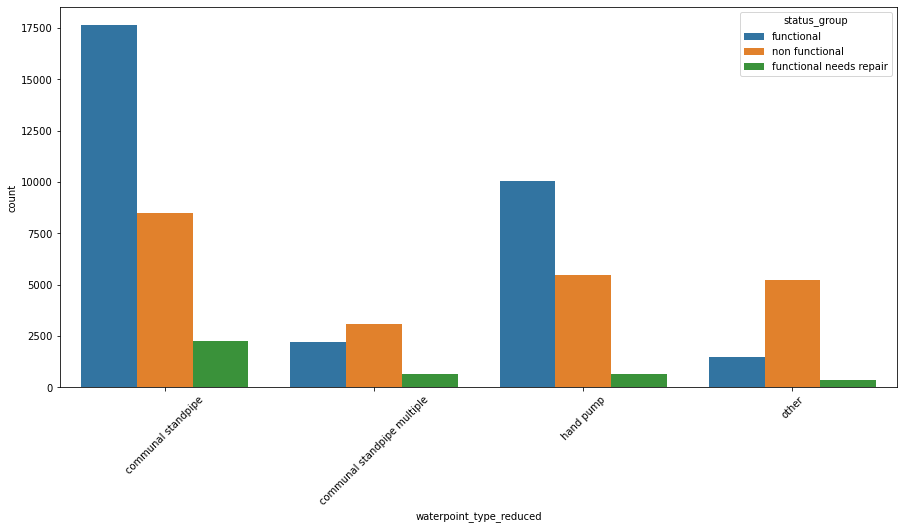

In [65]:
plt.figure(figsize=(15,7))

sns.countplot(data=df_comp_val,x=var_red,hue='status_group')
plt.xticks(rotation=45);

In [66]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var_red],prefix=var)],axis=1)

In [67]:
df_comp_val = df_comp_val.drop(labels=[var,var_red],axis=1)

### pump_age

In [78]:
var = 'pump_age'
var_red = var+'_reduced'

limited_list = df_comp_val[var].value_counts()[df_comp_val[var].value_counts().index < 0]
df_comp_val[var].value_counts()[df_comp_val[var].value_counts().index <= 10]

 3.0     3390
 1.0     2903
 2.0     2723
 5.0     2490
 4.0     2324
 7.0     1809
 6.0     1732
 8.0     1440
 10.0    1060
 9.0     1006
 0.0      729
-4.0        3
-5.0        3
-2.0        2
-7.0        2
-1.0        1
-3.0        1
Name: pump_age, dtype: int64

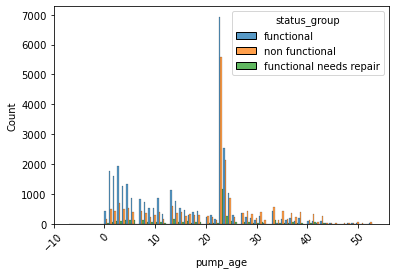

In [69]:
sns.histplot(data=df_comp_val,x=var,hue='status_group',multiple='dodge')
plt.xticks(rotation=45);

In [70]:
q20 = df_comp_val[var].quantile(0.2)
q40 = df_comp_val[var].quantile(0.4)
q60 = df_comp_val[var].quantile(0.6)
q80 = df_comp_val[var].quantile(0.8)
q100 = df_comp_val[var].quantile(1)

df_comp_val[var+'_bin'] = pd.cut(df_comp_val[var],bins=[0,q20,q40,q60,q80,q100],labels=['0-20','20-40','40-60','60-80','80-100']).astype(str)

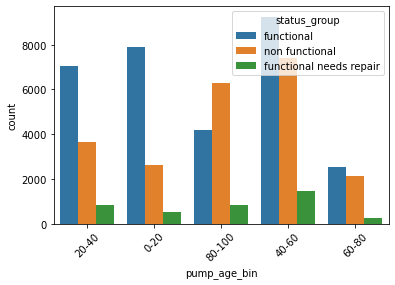

In [71]:
sns.countplot(data=df_comp_val,x=var+'_bin',hue='status_group')
plt.xticks(rotation=45);

In [72]:
df_comp_val = pd.concat([df_comp_val,pd.get_dummies(df_comp_val[var+'_bin'],prefix=var)],axis=1)

In [73]:
df_comp_val = df_comp_val.drop(labels=[var+'_bin'],axis=1)

## Feature Review

In [74]:
df_comp_val.iloc[:3,:]

,id,amount_tsh,longitude,latitude,district_code,population,public_meeting,permit,pump_age,status_group,...,source_class_surface,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_other,pump_age_0-20,pump_age_20-40,pump_age_40-60,pump_age_60-80,pump_age_80-100
0,69572,6000.0,34.938093,-9.856322,5,109,1,0,12.0,functional,...,0,1,0,0,0,0,1,0,0,0
1,8776,0.0,34.698766,-2.147466,2,280,1,0,3.0,functional,...,1,1,0,0,0,1,0,0,0,0
2,34310,25.0,37.460664,-3.821329,4,250,1,1,4.0,functional,...,1,0,1,0,0,1,0,0,0,0


In [75]:
df_comp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71981 entries, 0 to 71980
Data columns (total 70 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id                                           71981 non-null  int64  
 1   amount_tsh                                   71981 non-null  float64
 2   longitude                                    71981 non-null  float64
 3   latitude                                     71981 non-null  float64
 4   district_code                                71981 non-null  int64  
 5   population                                   71981 non-null  int64  
 6   public_meeting                               71981 non-null  int64  
 7   permit                                       71981 non-null  int64  
 8   pump_age                                     71981 non-null  float64
 9   status_group                                 57588 non-null  object 
 10

In [76]:
train_index = df_train_val.id.tolist()
test_index = df_test_val.id.tolist()

df_train_val_new = df_comp_val[df_comp_val.id.isin(train_index)]


df_train_val_new.to_csv(data_processed_dir+'training_data_encoded_no-geo.csv',index=False)

df_test_val_new = df_comp_val[df_comp_val.id.isin(test_index)]
df_test_val_new.to_csv(data_processed_dir+'test_data_encoded_no-geo.csv',index=False)